In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [26]:
dd =  pd.read_csv('driver-data.csv')
dd.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [27]:
dd = dd.drop('id',axis=1)
dd.head()

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


In [28]:
dd.describe()

,mean_dist_day,mean_over_speed_perc
count,4000.000000,4000.000000
mean,76.041523,10.721000
std,53.469563,13.708543
min,15.520000,0.000000
25%,45.247500,4.000000
50%,53.330000,6.000000
75%,65.632500,9.000000
max,244.790000,100.000000


In [29]:
KMeans().fit(dd).n_clusters

8

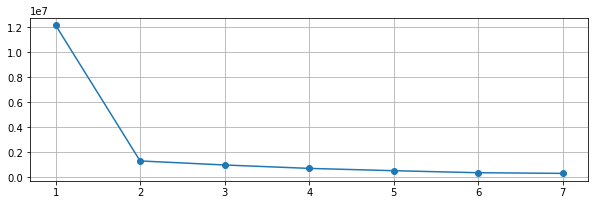

In [30]:
"How many clusters"
inertia=[]
clusters=range(1,8)
for x in clusters:
    model=KMeans(x)
    model.fit(dd)
    inertia.append(model.inertia_)
plt.figure(figsize=(10,3))
plt.grid(True)
plt.plot(clusters, inertia, '-o')
plt.xticks(clusters)
plt.show()

In [31]:
model=KMeans(4)
model.fit(dd)
y_pred = model.predict(dd)
centroids = model.cluster_centers_
centroids.shape

(4, 2)

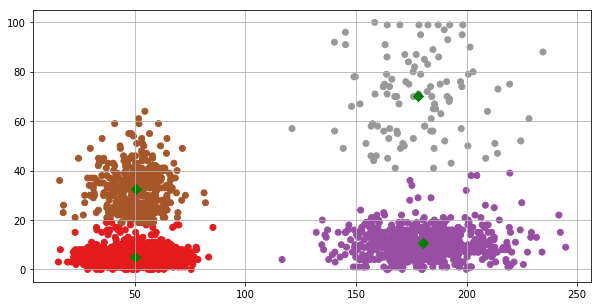

In [33]:
col1 = 0
col2 = 1
plt.figure(figsize=(10,5))
plt.scatter(dd.mean_dist_day, dd.mean_over_speed_perc, c=y_pred, cmap = 'Set1')
plt.scatter(centroids[:, col1], centroids[:, col2], marker='D', s=50, c='green')
plt.grid(True)
plt.show()

In [34]:
print('inertia: ',model.inertia_)

inertia:  719601.5383469037


__We can imporve clusterig using StandardScaler__

In [37]:
print(KMeans(4).fit(StandardScaler().fit_transform(dd)).inertia_)

739.1534508645581


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
